# 初期値の影響(Heの初期値)
    
   
* 初期値を適度にバラつかせる方法として、Kaiming Heらが提案する方法がある。
* Heの方法では、$\displaystyle \sqrt \frac{2}{n1}$を標準偏差とする。ここで、n1は前の層のノード数である。 Xavierの初期値にくらべ、広がりを持った初期値になる。
* 以下のシミュレーションでは、ReLU関数を使っていることに注意!!!!

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from common.activations import relu,sigmoid,tanh
np.random.seed(1234)

### [演習]
* Heの初期値を利用するための以下の関数を完成させましょう。
* def heのreturnに1行で書けます

In [2]:
def he(n1, n2):
    """
    Heの初期値を利用するための関数
    返り値は、見かけの標準偏差
    """    
    return np.sqrt(2/n1)                                       # <- 穴埋め

In [4]:
def xavier(n1, n2):
    """
    Xavierの初期値を利用するための関数
    返り値は、見かけの標準偏差
    """
    return np.sqrt(2/(n1+n2))   


def simulation(fsigma,factivate, num_in=100, num_x=1000, hidden_layer_size=5, num_node=100):
    """
    fsigma : 標準偏差を決めるための関数
    num_in : 入力層のノードの数
    num_x : 入力するデータの数
    hidden_layer_size : 中間層の層数
    num_node : 中間層のノード数
    sigma : 乱数を抽出する際に用いる正規分布の標準偏差
    """
    # num_in次元のデータをnum_x個つくる
    X = np.random.randn(num_x, num_in) # 標準正規分布からのサンプリング

    # 中間層ノードの値を格納するdict
    h = {}

    # 順伝播の計算
    for i in range(hidden_layer_size):
        if i==0:
            X_ = X
            n1 = num_in
        else:
            X_ = h[i-1]
            n1 = num_node
        
        n2 = num_node
        sigma = fsigma(n1, n2)

        # 重みの初期化
        W = np.random.randn(num_node, num_node) * sigma

        # 行列の積
        z = np.dot(X_, W)

        # 活性化関数に入れる
        a = factivate(z)

        # dictに格納
        h[i] = a

    return h

def histgram(h, ymax = 50000):
    plt.figure(figsize=(14,4))
    fig_num = len(h)
    for key,value in h.items():
        plt.subplot(1,fig_num, key+1)
        plt.title("hiddlen_layer=%s"%(key+1))
        plt.hist(value.flatten(), bins=70)
        plt.ylim([0, ymax])
        plt.xlim([0,3.0])
        if key!=0:
            plt.yticks([], [])
    plt.show()

## Xavierの初期値でサンプリングした場合

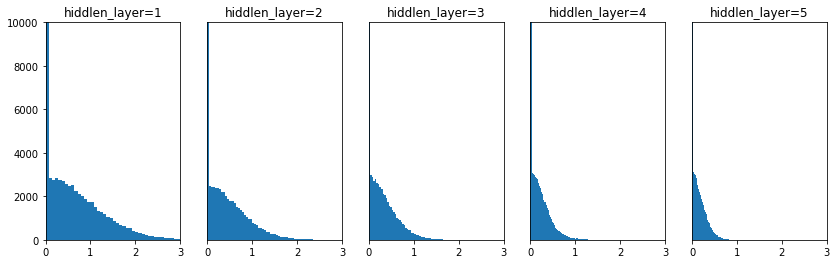

In [5]:
# 実験
n = 100
h = simulation(fsigma=xavier,factivate=relu, num_in=n, num_node=n)

# アクティベーションのヒストグラムを中間層ごとに描く
histgram(h, ymax=10000)

## Heの初期値でサンプリングした場合

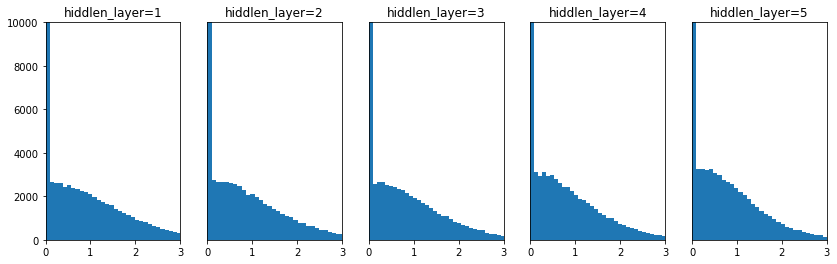

In [7]:
# 実験
n = 100
h = simulation(fsigma=he, factivate=relu,num_in=n, num_node=n)

# アクティベーションのヒストグラムを中間層ごとに描く
histgram(h, ymax=10000)

* Xavierの初期値に比べ、0側への偏りが緩和された

## Heの初期値にて、n数が大きくなった場合の確認

n=200


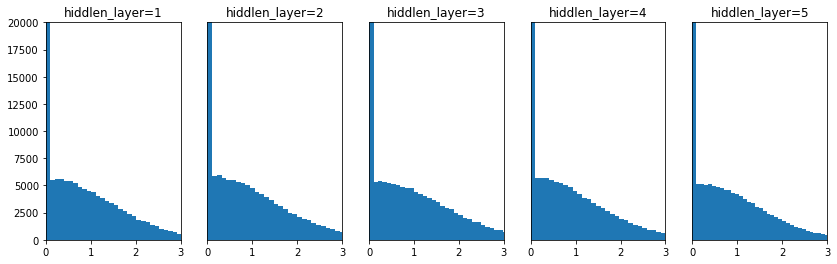

n=500


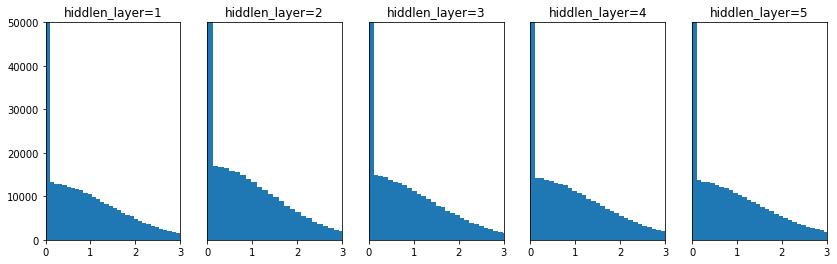

n=1000


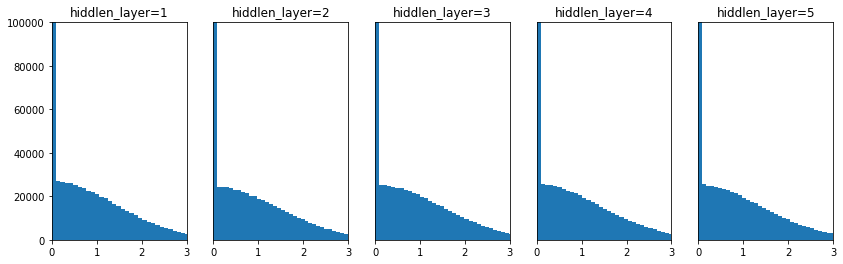

n=10000


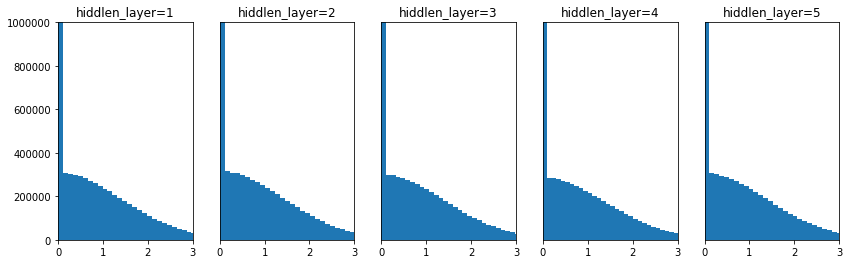

In [8]:
for n in [200, 500, 1000, 10000]:
    print("n=%s"%n)
    
    # 実験
    h = simulation(fsigma=he, factivate=relu,num_in=n, num_node=n)

    # アクティベーションのヒストグラムを中間層ごとに描く
    histgram(h, ymax=100*n)

### [演習]
* Heの初期値とXavierの初期値を比較し、それぞれの特徴を考察しましょう。

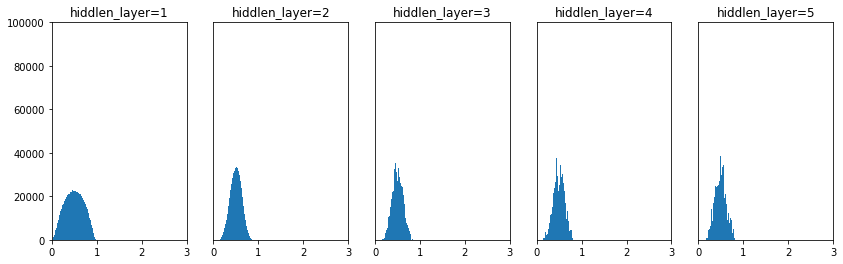

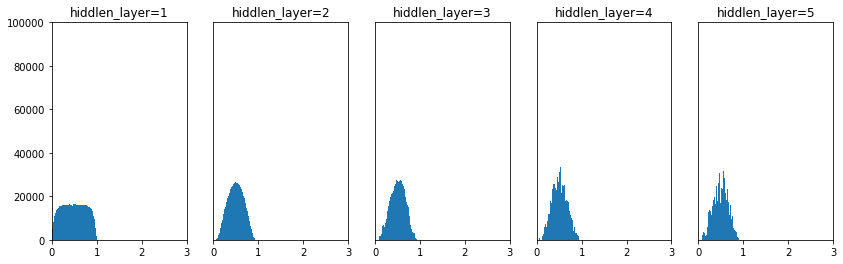

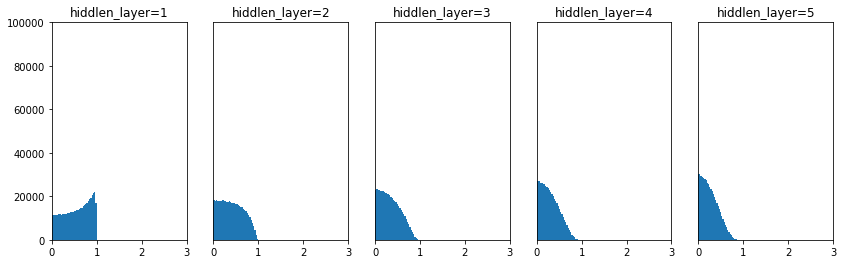

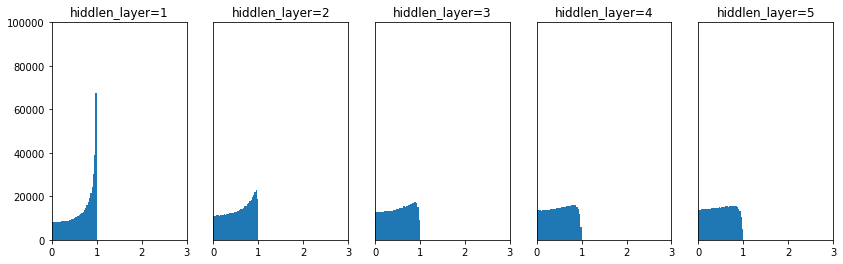

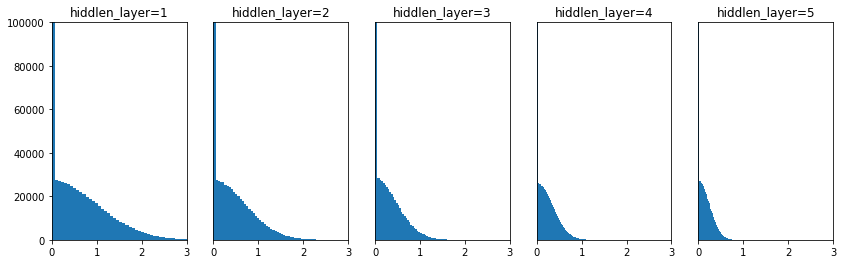

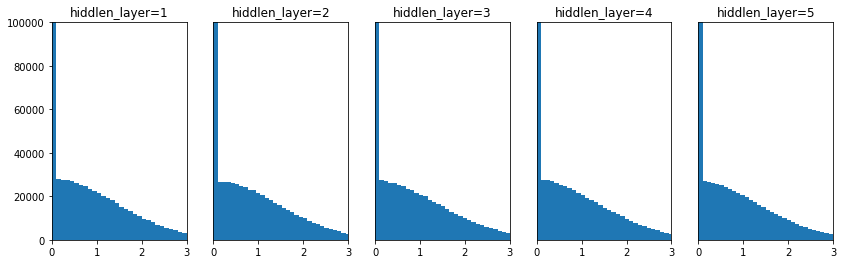

In [12]:
n=1000

for f in [sigmoid,tanh,relu]:
    h1 = simulation(fsigma=xavier, factivate=f,num_in=n, num_node=n)
    h2 = simulation(fsigma=he, factivate=f,num_in=n, num_node=n)

    # アクティベーションのヒストグラムを中間層ごとに描く
    histgram(h1, ymax=100000)
    histgram(h2, ymax=100000)